## How to detect multicollinearity 

A correlation matrix is a table that shows the correlation coefficients between a set of variables. The correlation coefficient measures the strength and direction of the linear relationship between two variables. A correlation coefficient ranges from -1 to 1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.

The correlation matrix is typically represented as a square matrix where each row and column corresponds to a variable in the dataset. The diagonal elements of the matrix show the correlation of each variable with itself, which is always 1. The off-diagonal elements show the correlation between pairs of variables.

The correlation coefficient between two variables x and y is given by:

$r_{xy} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}$

where $n$ is the number of observations, $x_i$ and $y_i$ are the values of the variables for the $i$th observation, $\bar{x}$ and $\bar{y}$ are the sample means of the variables, and $\sum$ represents the summation operator.

This formula calculates the covariance of the two variables, which is then standardized by dividing by the product of their standard deviations to obtain the correlation coefficient. The correlation coefficient ranges from -1 to 1, with negative values indicating a negative correlation, positive values indicating a positive correlation, and values close to 0 indicating no correlation.

The correlation matrix is a useful tool for detecting multicollinearity, as it allows us to identify variables that are highly correlated with each other. High correlation between two variables can indicate multicollinearity, which can lead to unstable and unreliable estimates in a regression model. In general, a correlation coefficient of 0.7 or higher is considered to indicate high correlation between two variables.

To detect multicollinearity using the correlation matrix, we can examine the values of the correlation coefficients between pairs of variables. If we find that two or more variables have high correlation coefficients, we can investigate further to determine if multicollinearity is present. This can involve examining scatterplots or calculating variance inflation factors (VIFs) to quantify the extent of multicollinearity.






          x1        x2        x3        x4
x1  1.000000 -0.020998  1.000000  0.999885
x2 -0.020998  1.000000 -0.020998 -0.005885
x3  1.000000 -0.020998  1.000000  0.999885
x4  0.999885 -0.005885  0.999885  1.000000


<AxesSubplot: >

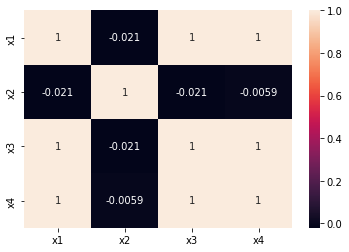

In [6]:
import pandas as pd
import seaborn as sns 

# create a sample dataset
data = {'x1': [1, 2, 3, 4, 5],
        'x2': [2, 40, 29, 22, 10],
        'x3': [3, 6, 9, 12, 15],
        'x4': [12, 26, 39, 52, 65]}

df = pd.DataFrame(data)

# calculate the correlation matrix
corr_matrix = df.corr()
print(corr_matrix)
sns.heatmap(corr_matrix,annot=True)



# VIF

##### VIF for the predictor variable by dividing 1 by the difference between 1 and the R-squared(reduced) value:

$ VIF = 1 / (1 - R-squared(reduced)) $

In [4]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Scale the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the VIF values
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif)


  Variable        VIF
0      age   1.217307
1      sex   1.278071
2      bmi   1.509437
3       bp   1.459428
4       s1  59.202510
5       s2  39.193370
6       s3  15.402156
7       s4   8.890986
8       s5  10.075967
9       s6   1.484623


- The variables "age," "sex," "bmi," "bp," and "s6" have VIF values around or below 2. These values indicate low to moderate levels of multicollinearity, suggesting that these variables are not highly correlated with the other predictors.

- On the other hand, the variables "s1," "s2," "s3," "s4," and "s5" have relatively high VIF values. The VIF values for "s1" and "s2" are particularly high, indicating strong multicollinearity between these variables and others in the dataset.

In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Generate a sample dataset with multicollinearity
X, y = make_regression(n_samples=100, n_features=4, noise=0.5, random_state=42)
X[:, 3] = X[:, 0] + X[:, 1] + X[:, 2]  

# Fit the linear regression model with multicollinearity
model = LinearRegression()
model.fit(X, y)

# Calculate the coefficients with multicollinearity
coefficients_with_multicollinearity = model.coef_

# Remove the column causing multicollinearity
X_new = np.delete(X, 3, axis=1)

# Fit the linear regression model without multicollinearity
model_new = LinearRegression()
model_new.fit(X_new, y)

# Calculate the coefficients without multicollinearity
coefficients_without_multicollinearity = model_new.coef_

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Variable': ['X1', 'X2', 'X3', 'X4'],
    'Coefficients (with multicollinearity)': coefficients_with_multicollinearity,
    'Coefficients (without multicollinearity)': np.append(coefficients_without_multicollinearity, 0)
})

# Display the results
print("Results with multicollinearity:")
print(results_df[['Variable', 'Coefficients (with multicollinearity)']])

print("\nResults without multicollinearity:")
print(results_df[['Variable', 'Coefficients (without multicollinearity)']])


Results with multicollinearity:
  Variable  Coefficients (with multicollinearity)
0       X1                              56.135743
1       X2                             -23.504031
2       X3                              -2.912970
3       X4                              29.718742

Results without multicollinearity:
  Variable  Coefficients (without multicollinearity)
0       X1                                 85.854485
1       X2                                  6.214711
2       X3                                 26.805772
3       X4                                  0.000000
